In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [123]:
import tailer
import pandas as pd
import io

In [125]:
# Load your CSV file
csv_file_path = 'color128_csvs/COLOR_output.csv'
df = pd.read_csv(csv_file_path, header=0, dtype=int)

# Extract labels and pixel values
labels = df.iloc[:, 0].values
pixels = df.iloc[:, 1:].values.reshape(-1, 128, 128, 3)  # Reshape for color images (assuming 3 channels RGB)


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    pixels, labels, test_size=0.2, random_state=42, stratify=labels, 
    class_weight='balanced'
)

# ## DELETE ##
# label_to_keep = 1

# # For training set
# train_mask = (y_train == label_to_keep)
# X_train_filtered = X_train[train_mask]
# y_train_filtered = y_train[train_mask]

# # For test set
# test_mask = (y_test == label_to_keep)
# X_test_filtered = X_test[test_mask]
# y_test_filtered = y_test[test_mask]
# ## DELETE ##




# Normalize pixel values to the range [0, 1] for color images
X_train = X_train / 255.0
X_test = X_test / 255.0

TypeError: got an unexpected keyword argument 'class_weight'

In [113]:
# For color images, reshape the input arrays to have 3 channels (RGB)
# X_train = np.tile(X_train, (1, 1, 1, 3))
# X_test = np.tile(X_test, (1, 1, 1, 3))

print("x_train items: ", len(X_train))
print("x_test items: ", len(X_test))

x_train items:  11200
x_test items:  2800


In [114]:
# Define the model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 63, 63, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 dropout_22 (Dropout)        (None, 61, 61, 128)       0         
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 28, 28, 256)     

In [115]:
# Set up callbacks
checkpoint = ModelCheckpoint('color_best_model.h5', save_best_only=True)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [116]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/5
280/280 [==============================] - ETA: 0s - loss: 1.7843 - accuracy: 0.4549

/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


280/280 [==============================] - 307s 1s/step - loss: 1.7843 - accuracy: 0.4549 - val_loss: 1.8125 - val_accuracy: 0.5415
Epoch 2/5
280/280 [==============================] - 301s 1s/step - loss: 1.6443 - accuracy: 0.4652 - val_loss: 1.7306 - val_accuracy: 0.5415
Epoch 3/5
280/280 [==============================] - 301s 1s/step - loss: 1.5893 - accuracy: 0.4762 - val_loss: 1.7267 - val_accuracy: 0.5429
Epoch 4/5
280/280 [==============================] - 302s 1s/step - loss: 1.5388 - accuracy: 0.4850 - val_loss: 1.7052 - val_accuracy: 0.5612
Epoch 5/5
280/280 [==============================] - 303s 1s/step - loss: 1.4945 - accuracy: 0.4943 - val_loss: 1.6099 - val_accuracy: 0.5562


88/88 [==============================] - 26s 295ms/step - loss: 1.6114 - accuracy: 0.5586
Test Loss: 1.6114
Test Accuracy: 0.5586
88/88 [==============================] - 26s 292ms/step
Correct Predictions: 1564 out of 2800
Test Accuracy (Manual Calculation): 0.5586

Predicted Labels vs True Labels:
Predicted | True
        0 |    2
        0 |    0
        0 |    3
        0 |    3
        0 |    0
        0 |    0
        1 |    1
        0 |    0
        0 |    0
        0 |    0


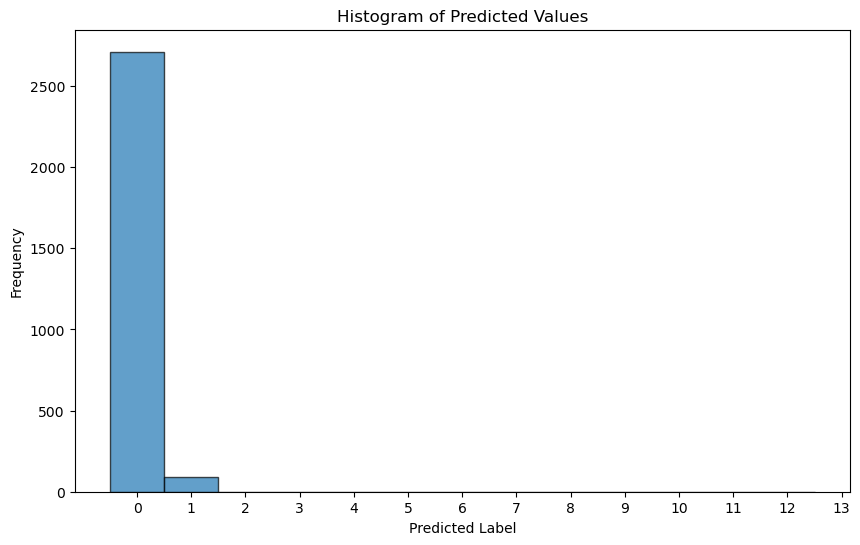

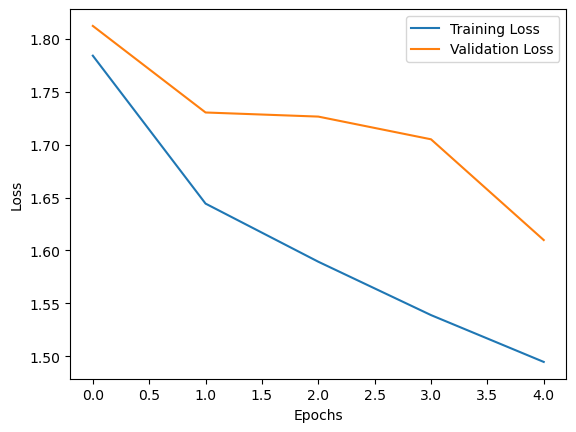

In [117]:
## TEMPORARY ##
#
#
#
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with true labels
correct_predictions = np.sum(predicted_labels == y_test)
total_samples = len(y_test)

print(f'Correct Predictions: {correct_predictions} out of {total_samples}')
print(f'Test Accuracy (Manual Calculation): {correct_predictions / total_samples:.4f}')

# Print some predicted values alongside true labels
print("\nPredicted Labels vs True Labels:")
print("Predicted | True")
for i in range(min(10, total_samples)):  # Print up to 10 samples for visibility
    print(f"{predicted_labels[i]:9} | {y_test[i]:4}")

# Plot a histogram of the predicted values
plt.figure(figsize=(10, 6))
plt.hist(predicted_labels, bins=np.arange(14) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(14))
plt.xlabel('Predicted Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.show()

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [108]:

# Normalize pixel values to the range [0, 1] for color images
pixels = pixels / 255.0

# Replicate channels to match the expected input shape during training
pixels = np.tile(pixels, (1, 1, 1, 3))

# Make predictions using the model
predictions = model.predict(pixels)

# Get the predicted labels (index of the maximum probability)
predicted_labels = np.argmax(predictions, axis=1)


# Ensure that labels and predicted_labels have the same length
min_length = min(len(labels), len(predicted_labels))
labels = labels[:min_length]
predicted_labels = predicted_labels[:min_length]

UnimplementedError: Graph execution error:

Detected at node sequential_18/conv2d_42/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/simoncook/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/simoncook/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/simoncook/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/46/t00g_1qx62j_227lft4fyhyh0000gn/T/ipykernel_11615/3872008558.py", line 8, in <module>

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2631, in predict

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2416, in predict_function

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2401, in step_function

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2389, in run_step

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2357, in predict_step

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/Users/simoncook/anaconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5397, in relu

Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_18/conv2d_42/Relu}}]] [Op:__inference_predict_function_31129]

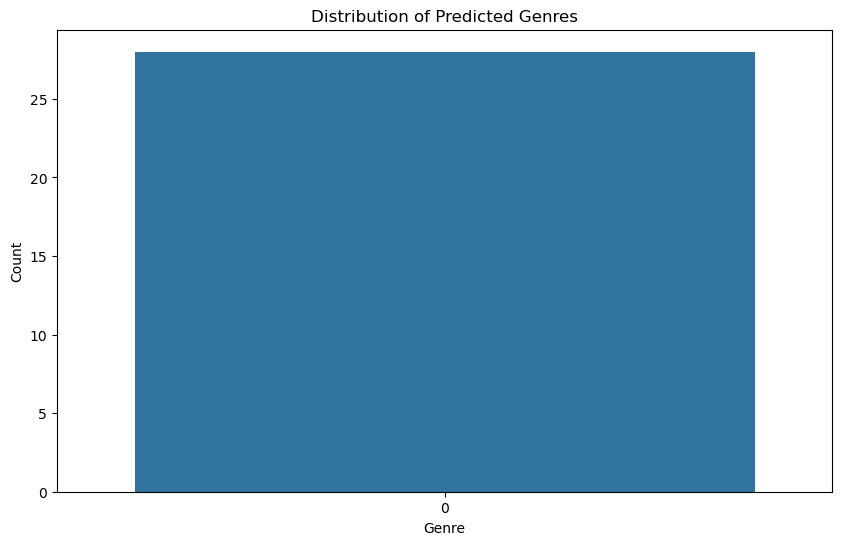

Classification Report:


ValueError: Found input variables with inconsistent numbers of samples: [140, 28]

In [109]:
import seaborn as sns
from sklearn.metrics import classification_report

# Plot the distribution of predicted genres
plt.figure(figsize=(10, 6))
sns.countplot(predicted_labels)
plt.title('Distribution of Predicted Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()



# Print classification report and confusion matrix
print('Classification Report:')
print(classification_report(labels, predicted_labels))

conf_matrix = confusion_matrix(labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(14), yticklabels=range(14))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.show()

Distribution of Genres in Training Data:
0    7689
1    2283
2    1904
3    2124
Name: count, dtype: int64


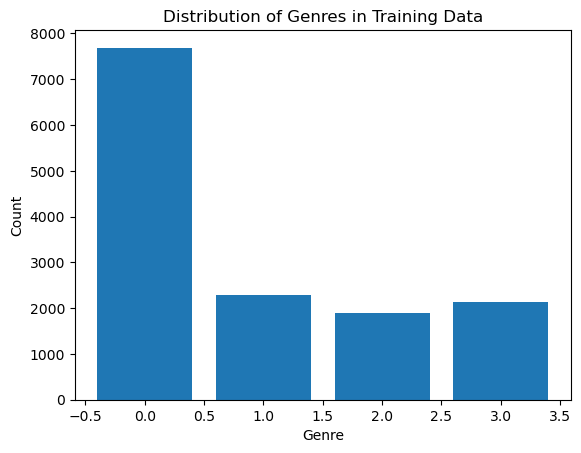

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'labels' is the array containing true labels for training data
# For example, labels = y_train if using the provided code

# Print the distribution of genres in the training data
training_genre_distribution = pd.Series(labels).value_counts().sort_index()

print("Distribution of Genres in Training Data:")
print(training_genre_distribution)

# Plot the distribution for visualization
plt.bar(training_genre_distribution.index, training_genre_distribution.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres in Training Data')
plt.show()

In [120]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, './color_model')